In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

data = pd.read_csv("../input/weatherAUS.csv")

#First check the data..
#print(data.info())
#data[0:5]

Lets deal with the null values.I dont need location for analysis.And i'll ignore 'Evaporation','Sunshine','Cloud3pm','Cloud9am' because of the null values..One more think i remove 'RISK_MM' because it has lots of 0..

In [2]:
data = data.drop(columns=['Location','Date','Evaporation','Sunshine','Cloud3pm','Cloud9am','RISK_MM'],axis=1)

Replace categorical values with the numbers..And remove null valued rows..

In [3]:
data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

#remove null values
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
print(data.shape)

#make columns from categorical values.We have to numarize this columns..
categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
data = pd.get_dummies(data, columns=categorical_columns)
print(data.shape)

(112925, 17)
(112925, 62)


Lets clear our dataset from inconvenient datas and normalize it

In [4]:
from sklearn import preprocessing
from scipy.stats import zscore

numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols].apply(zscore)

#Scaling data..
data = data.astype('float64')
scaler = preprocessing.MinMaxScaler()
scaler.fit(data)
data = pd.DataFrame(scaler.transform(data), index=data.index, columns=data.columns)

#Lets divide our features..
X = data.loc[:,data.columns!='RainTomorrow']
y = data['RainTomorrow']

Ok lets select best features for KNN and split data to train and test

In [5]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split

selector = SelectKBest(chi2, k=4)
selector.fit_transform(X, y)
print(X.columns[selector.get_support(indices=True)])

#Lets change our training data set with the best features calculated by feature selection..

X = data[X.columns[selector.get_support(indices=True)]]

#spliting data for train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

Index(['Rainfall', 'Humidity9am', 'Humidity3pm', 'RainToday'], dtype='object')


Show data distribution..

0.0    87906
1.0    25019
Name: RainTomorrow, dtype: int64


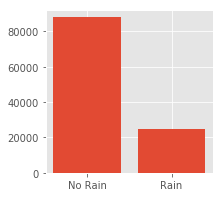

In [6]:
import matplotlib.pyplot as plt
import matplotlib.style as sty

sty.use('ggplot')
plt.figure(figsize=(3,3))
plt.hist(y,bins=2,rwidth=0.8)
plt.xticks([0.25,0.75],['No Rain','Rain'])

print(y.value_counts())


Ok lets try with all these values..

In [7]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(x_train,y_train.values.ravel())
y_pred_KNN = knn.predict(x_test)
print(" {} nn score: {} ".format(20,knn.score(x_test,y_test)))

 20 nn score: 0.8316311470570872 


Visualize confusion matrix for KNN

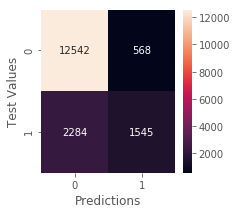

In [8]:
from sklearn.metrics import confusion_matrix

confMatKnn = confusion_matrix(y_test,y_pred_KNN)

f, ax = plt.subplots(figsize = (3,3))
sns.heatmap(confMatKnn,annot=True,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predictions")
plt.ylabel("Test Values")
plt.show()

Lets Check for the best n_neighbors for KNN

In [9]:
#This part can take time..
#r = range(15,20)
#for i in r:
#    knn = KNeighborsClassifier(n_neighbors = i)
#    knn.fit(x_train,y_train.values.ravel())
#    #prediction = knn.predict(x_test)
#    print(" {} nn score: {} ".format(i,knn.score(x_test,y_test)))    

Lets Try With Naive Bayes..

In [10]:
from sklearn.naive_bayes import GaussianNB

gaussianNB = GaussianNB()
gaussianNB.fit(x_train,y_train.values.ravel())
y_pred_NB = gaussianNB.predict(x_test)
print("Gaussian NB score: " , gaussianNB.score(x_test,y_test))

Gaussian NB score:  0.80170021843084


Visualize confusion matrix for Naive Bayes Gaussian

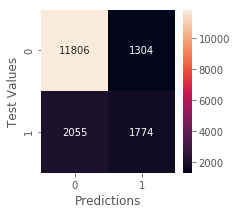

In [11]:
confMatNB = confusion_matrix(y_test,y_pred_NB)

f, ax = plt.subplots(figsize = (3,3))
sns.heatmap(confMatNB,annot=True,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predictions")
plt.ylabel("Test Values")
plt.show()

Decision Tree Classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier

dtClassifier = DecisionTreeClassifier()
dtClassifier.fit(x_train,y_train)
y_pred_DT = dtClassifier.predict(x_test)
print("Decision Tree Classifier NB score: " , dtClassifier.score(x_test,y_test))


Decision Tree Classifier NB score:  0.8009917940846567


Visualize confusion matrix for Decision Tree Classifier

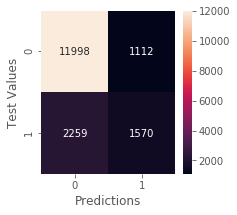

In [13]:
confMatDT = confusion_matrix(y_test,y_pred_DT)

f, ax = plt.subplots(figsize = (3,3))
sns.heatmap(confMatDT,annot=True,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predictions")
plt.ylabel("Test Values")
plt.show()

Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

rfClassifier = RandomForestClassifier(n_estimators = 20,random_state = 1)
rfClassifier.fit(x_train,y_train.values.ravel())
y_pred_RF = rfClassifier.predict(x_test)
print("Random Forest Classifier NB score: " , dtClassifier.score(x_test,y_test))

Random Forest Classifier NB score:  0.8009917940846567


Visualize confusion matrix for Random Forest Classifier

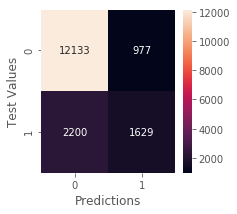

In [15]:
confMatRF = confusion_matrix(y_test,y_pred_RF)

f, ax = plt.subplots(figsize = (3,3))
sns.heatmap(confMatRF,annot=True,fmt=".0f",ax=ax)
plt.xlabel("Predictions")
plt.ylabel("Test Values")
plt.show()